Found 1081 images belonging to 4 classes.
Found 269 images belonging to 4 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 333s 9s/step - accuracy: 0.2773 - loss: 1.4598 - val_accuracy: 0.2862 - val_loss: 1.3770
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.3104 - loss: 1.3725 - val_accuracy: 0.2974 - val_loss: 1.3693
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.2687 - loss: 1.3930 - val_accuracy: 0.2974 - val_loss: 1.3698
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.3349 - loss: 1.3669 - val_accuracy: 0.2862 - val_loss: 1.3669
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.2986 - loss: 1.3676 - val_accuracy: 0.5762 - val_loss: 1.3607
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.3406 - loss: 1.3608 - val_accuracy: 0.2974 - val_loss: 1.3696
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.3354 - loss: 1.3692 - val_accuracy: 0.3680 - val_loss: 1.3569
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.3135 - loss: 1.3660 - val_accuracy: 0.

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 981ms/step


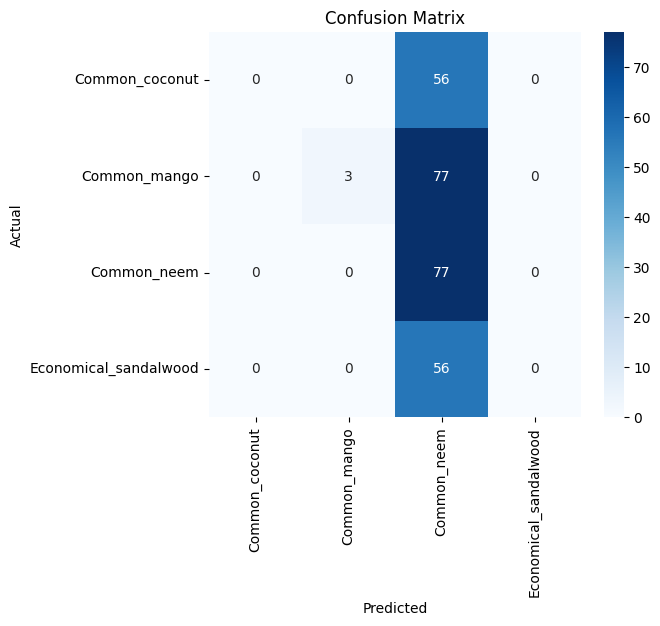

                       precision    recall  f1-score   support

       Common_coconut       0.00      0.00      0.00        56
         Common_mango       1.00      0.04      0.07        80
          Common_neem       0.29      1.00      0.45        77
Economical_sandalwood       0.00      0.00      0.00        56

             accuracy                           0.30       269
            macro avg       0.32      0.26      0.13       269
         weighted avg       0.38      0.30      0.15       269



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving 274.jpg to 274.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


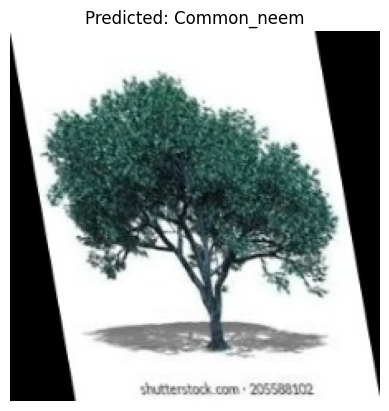

Predicted Class: Common_neem


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from google.colab import files
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

# Define dataset path
train_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/test'

# Data Preprocessing
img_size = (224, 224)
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Define Model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
epochs = 20
history = model.fit(train_data, validation_data=test_data, epochs=epochs)

# Save the Model
model.save('/content/drive/MyDrive/Colab_Notebooks/Species_classifier_model/tree_species_efficientnet.h5')

# Evaluate Model
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=train_data.class_indices.keys()))

# Function to classify a single image
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')
